# Linear Kernel CCA Tutorial & Validation

In this notebook we show that the implementation of the Linear Kernel CCA establishes a linear relationship between two views of data that are linearly related based on shared latent variables. We also show a case where linear KCCA outperforms GCCA.

## Initialization

In [27]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("../../..")
from multiview.embed.kcca import KCCA
from multiview.embed.gcca import GCCA

import matplotlib.pyplot as plt

# Initialize number of samples
nSamples = 1000
np.random.seed(30)

# Define two latent variables (number of samples x 1)
latvar1 = np.random.randn(nSamples,)
latvar2 = np.random.randn(nSamples,)

# Define independent components for each dataset (number of observations x dataset dimensions)
indep1 = np.random.randn(nSamples, 4)
indep2 = np.random.randn(nSamples, 5)

# Create two datasets, with each dimension composed as a sum of 75% one of the latent variables and 25% independent component
view1 = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
view2 = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T

# Split each dataset into a training set and test set (10% of dataset is training data)
train1 = view1[:int(nSamples/10)]
train2 = view2[:int(nSamples/10)]
test1 = view1[int(nSamples/10):]
test2 = view2[int(nSamples/10):]

([], <a list of 0 Text yticklabel objects>)

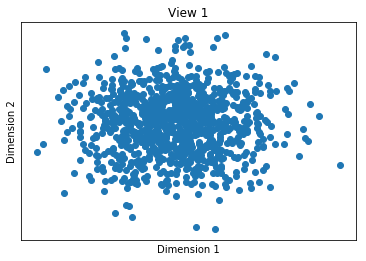

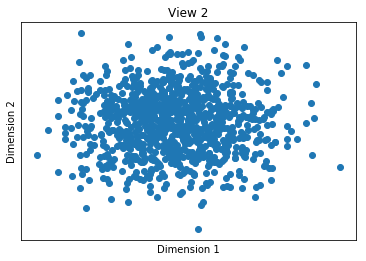

In [29]:
# View 1 of the data is a 1000 x 4 matrix
# We plot the first two dimensions
fig = plt.figure()
plt.scatter(view1[:,0],view1[:,1])
plt.title('View 1')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.xticks([])
plt.yticks([])

# View 2 of the data is a 1000 x 5 matrix
# We plot the first two dimensions
fig = plt.figure()
plt.scatter(view2[:,0],view2[:,1])
plt.title('View 2')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.xticks([])
plt.yticks([])

## Build linear KCCA mapping on training data

Our implementation of linear kCCA projects each view by taking the linear inner product of each view.

In [4]:
# Initialize a linear kCCA class
kcca_l = KCCA(ktype ="linear", reg = 0.001, n_components = 4)

# Use the fit.transform method to find a kCCA mapping and transform the views of data
kcca_training = kcca_l.fit_transform([train1, train2])

# Get attributes from the kCCA mapping on training data
train_weights = kcca_training.weights_
train_ccomponents = kcca_training.components_
train_ccorrelations = kcca_training.cancorrs_

kCCA should maximize the correlation between the components between the two views. To confirm that kCCA works, we plot the same components of each of the views. The embeddings should be linear for the first couple of components

([], <a list of 0 Text yticklabel objects>)

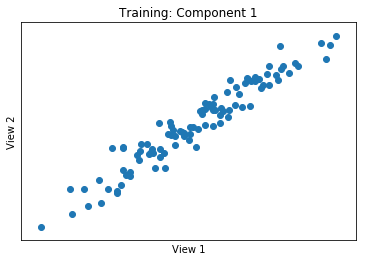

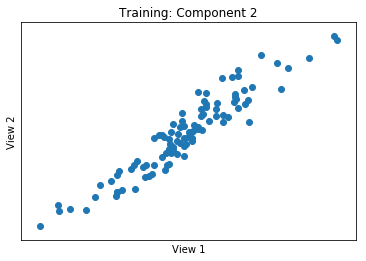

In [5]:
fig = plt.figure()
plt.scatter(train_ccomponents[0][:,0],train_ccomponents[1][:,0])
plt.title('linear kcca Training: Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(train_ccomponents[0][:,1],train_ccomponents[1][:,1])
plt.title('linear kcca Training: Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

In [6]:
print('''The canonical correlations are:\n
Dimension 1: %.04f\n
Dimension 2: %.04f\n
Dimension 3: %.04f\n
Dimension 4: %.04f
'''% tuple(kcca_training.cancorrs_))

The canonical correlations are:

Dimension 1: 0.9627

Dimension 2: 0.9444

Dimension 3: 0.1046

Dimension 4: 0.1442



The canonical correlation can be seen as a metric of successful joint information reduction between two views and, therefore, routinely serves as a performance measure for CCA. We can see that the two canonical components capture correlational relationships between the datasets, as the first two canonical correlations are both above 0.94. The third and the fourth canonical components do not capture meaningful relationships between the datasets. The third and the fourth canonical correlations are very low.

To further confirm that linear kcca worked properly we plot the first two canonical components for each view. The projections should be similar in shape as each of the components across both views are maximally corrolated

([], <a list of 0 Text yticklabel objects>)

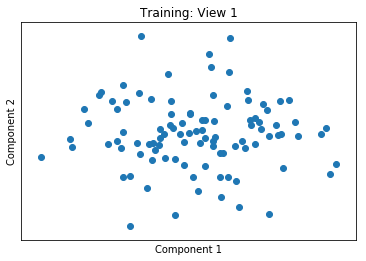

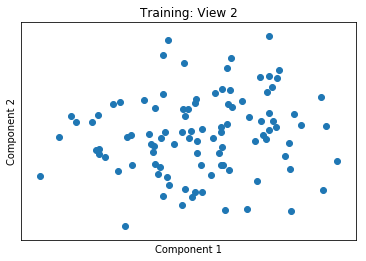

In [7]:
fig = plt.figure()
plt.scatter(train_ccomponents[0][:,0],train_ccomponents[0][:,1])
plt.title('linear kcca Training: View 1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(train_ccomponents[1][:,0],train_ccomponents[1][:,1])
plt.title('linear kcca Training: View 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xticks([])
plt.yticks([])

We have shown that the linear kcca mapping we generated with the training datasets maximizes the correlations between the canonical components. We now want to apply the linear kcca mapping to the testing dataset to see how well the mapping generalizes to the rest of the data

## Applying linear KCCA model to testing data

In [8]:
# Use the transform method to apply the kCCA mapping to the testing data
kcca_testing = kcca_l.transform([test1, test2])

# Get attributes from the kCCA mapping on testing data
test_weights = kcca_testing.weights_
test_ccomponents = kcca_testing.components_
test_ccorrelations = kcca_testing.cancorrs_

([], <a list of 0 Text yticklabel objects>)

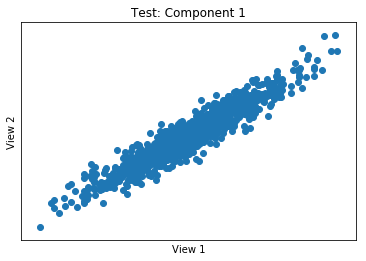

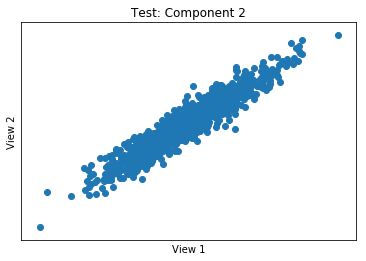

In [9]:
# We plot the same components across each view to see if the linear kcca mapping generalizes to the training data
# Again, the plots should show a linear correlation

fig = plt.figure()
plt.scatter(test_ccomponents[0][:,0],test_ccomponents[1][:,0])
plt.title('linear kcca Test: Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(test_ccomponents[0][:,1],test_ccomponents[1][:,1])
plt.title('linear kcca Test: Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])


In [10]:
print('''The canonical correlations for the test data are:\n
Dimension 1: %.04f\n
Dimension 2: %.04f\n
Dimension 3: %.04f\n
Dimension 4: %.04f
'''% tuple(test_ccorrelations))

print('''The canonical correlations are high for the first two dimensions and are only slightly smaller than the testing data''')

The canonical correlations for the test data are:

Dimension 1: 0.9439

Dimension 2: 0.9479

Dimension 3: 0.0445

Dimension 4: -0.0229

The canonical correlations are high for the first two dimensions and are only slightly smaller than the testing data


([], <a list of 0 Text yticklabel objects>)

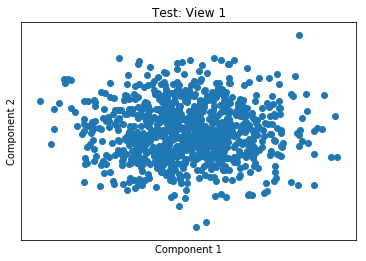

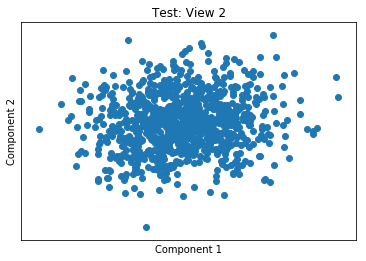

In [11]:
fig = plt.figure()
plt.scatter(test_ccomponents[0][:,0],test_ccomponents[0][:,1])
plt.title('linear kcca Test: View 1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(test_ccomponents[1][:,0],test_ccomponents[1][:,1])
plt.title('linear kcca Test: View 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xticks([])
plt.yticks([])

## Further validation

Because the canonical mapping for the training data generalized to the testing data we can verify that linear kcca discovered the relationship between the two views of the data. 

We further can confirm this determining the prediction accuracy of the linear kcca mapping. We do this by comparing the dimensions of the test data canonical projections and the original test data. We take the inverse of the weights to derive the original data from the canonical projection.

In [12]:
# Computes the accuracy of the mapping by comparing the canonical components to the original data
accuracy = kcca_testing.validate([test1, test2])

In [13]:
print('''The prediction accuracy for the first dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
'''% tuple(accuracy[0]))
print('''The prediction accuracy for the second dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
Dimension 5: %.02f
'''% tuple(accuracy[1]))

The prediction accuracy for the first dataset is:

Dimension 1: 0.89

Dimension 2: 0.86

Dimension 3: 0.88

Dimension 4: 0.86


The prediction accuracy for the second dataset is:

Dimension 1: 0.90

Dimension 2: 0.92

Dimension 3: 0.86

Dimension 4: 0.91

Dimension 5: 0.90



Linear kcca works because we were able to derive the linear relationship between the two views. This is shown by using the canonical weights derived from the training data on the testing data. We see that the accuracy of the model on the training data is at least 86% for each of the dimensions, which proves that linear kcca works.

# Linear KCCA vs. GCCA

In [14]:
gcca = GCCA(n_components=4)
gcca_training = gcca.fit_transform([train1, train2])

gcca_test = gcca.transform([test1, test2])

## Developing GCCA model on training data

([], <a list of 0 Text yticklabel objects>)

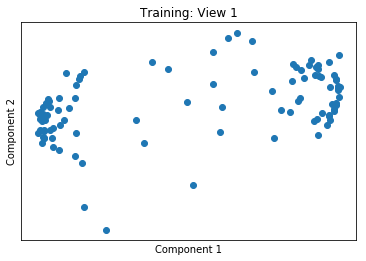

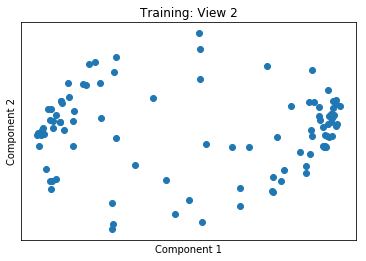

In [15]:
# Plotting first two training canonical components of each view
fig = plt.figure()
plt.scatter(gcca_training[0][:,0],gcca_training[0][:,1])
plt.title('gcca Training: View 1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(gcca_training[1][:,0],gcca_training[1][:,1])
plt.title('gcca Training: View 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

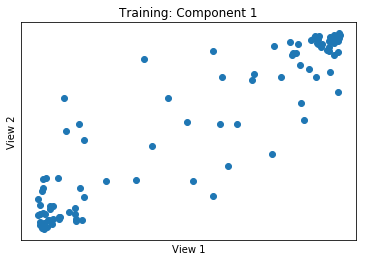

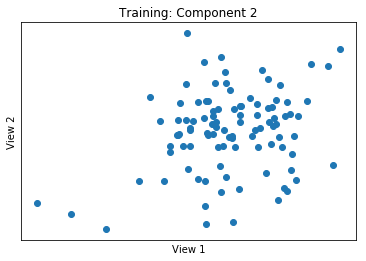

In [16]:
# Plotting training canonical components of each view. 
fig = plt.figure()
plt.scatter(gcca_training[0][:,0],gcca_training[1][:,0])
plt.title('gcca Training: Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(gcca_training[0][:,1],gcca_training[1][:,1])
plt.title('gcca Training: Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

## Testing GCCA model on testing data

([], <a list of 0 Text yticklabel objects>)

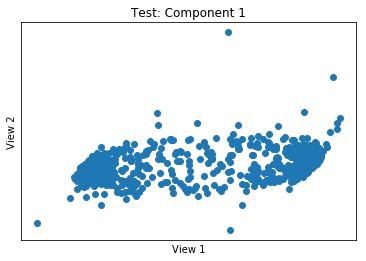

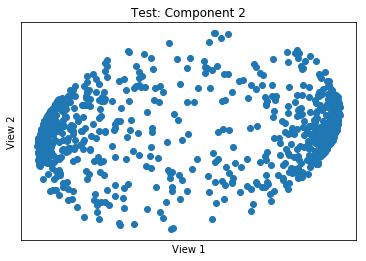

In [17]:
# Plotting the test gcca views into the same latent space
fig = plt.figure()
plt.scatter(gcca_test[0][:,0],gcca_test[0][:,1])
plt.title('gcca Test: Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(gcca_test[1][:,0],gcca_test[1][:,1])
plt.title('gcca Test: Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

We observe that the embedding does not look that similar across both views

([], <a list of 0 Text yticklabel objects>)

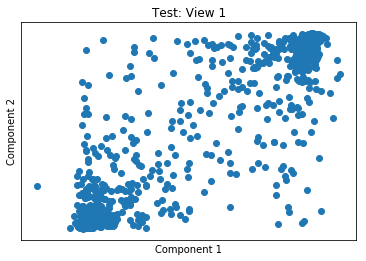

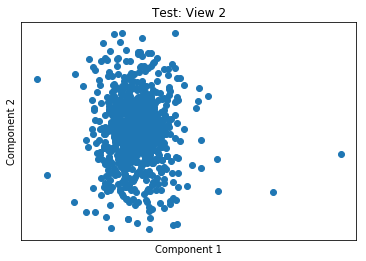

In [18]:
# Plotting testing canonical components of each view.
fig = plt.figure()
plt.scatter(gcca_test[0][:,0],gcca_test[1][:,0])
plt.title('gcca Test: View 1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(gcca_test[0][:,1],gcca_test[1][:,1])
plt.title('gcca Test: View 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xticks([])
plt.yticks([])

We see that the plots do not resemble a line (as cca should maximizes this correlation).


# Linear KCCA vs. sklearn CCA

## Developing sklearn CCA model on training data

In [19]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
cca.fit(train1, train2)
train1_c, train2_c = cca.transform(train1, train2)

([], <a list of 0 Text yticklabel objects>)

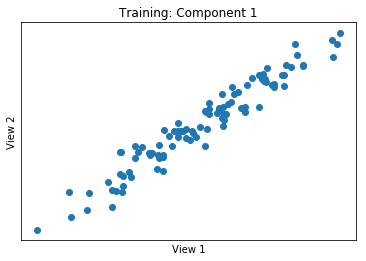

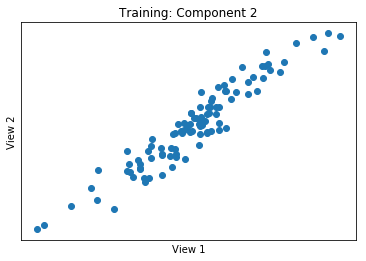

In [20]:
fig = plt.figure()
plt.scatter(train1_c[:,0],train2_c[:,0])
plt.title('sklearn CCA Training: Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(train1_c[:,1],train2_c[:,1])
plt.title('sklearn CCA Training: Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

In [21]:
from scipy.stats import pearsonr
corr1, _ = pearsonr(train1_c[:,0],train2_c[:,0])
corr2, _ = pearsonr(train1_c[:,1],train2_c[:,1])

print('Canonical Correlation for Component 1: %.4f' % corr1)
print('Canonical Correlation for Component 2: %.4f' % corr2)

Canonical Correlation for Component 1: 0.9675
Canonical Correlation for Component 2: 0.9519


There is a high linear correlation between view 1 and view 2 of each component. Signals that the algorithm accurately discovered the relationship between the two views.

Lets see how the cca mapping generalizes to the test data

## Testing sklearn CCA model on testing data

([], <a list of 0 Text yticklabel objects>)

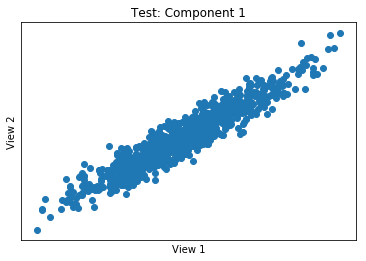

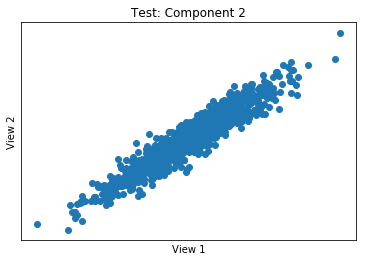

In [23]:
test1_c, test2_c = cca.transform(test1, test2)

fig = plt.figure()
plt.scatter(test1_c[:,0],test2_c[:,0])
plt.title('sklearn CCA Test: Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

fig = plt.figure()
plt.scatter(test1_c[:,1],test2_c[:,1])
plt.title('sklearn CCA Test: Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')
plt.xticks([])
plt.yticks([])

In [24]:
from scipy.stats import pearsonr
corr1_tr, _ = pearsonr(train1_c[:,0],train2_c[:,0])
corr2_tr, _ = pearsonr(train1_c[:,1],train2_c[:,1])

print('Canonical Correlation for Component 1: %.4f' % corr1_tr)
print('Canonical Correlation for Component 2: %.4f' % corr2_tr)

Canonical Correlation for Component 1: 0.9675
Canonical Correlation for Component 2: 0.9519


SKlearn's CCA generalizes the mapping from the training data very well to the test data. The correlations are even higher than the linear KCCA.

# Where linear kCCA fails

Linear kCCA (as well as gCCA and sklearn's cca) will fail when the relationship between two views are non-linear. For example in the following example the relationship between the two is polynomial.

In [25]:
pdata1 = 0.25*indep1 + 0.75*np.vstack((latvar1**2, latvar2**2, latvar1**2, latvar2**2)).T
pdata2 = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T

# Initialize a linear kCCA class
kcca_lp = KCCA(ktype ="linear", reg = 0.001, n_components = 4)

# Use the fit.transform method to find a kCCA mapping and transform the views of data
kcca_p = kcca_lp.fit_transform([pdata1, pdata2])

# Get attributes from the kCCA mapping on training data
p_weights = kcca_p.weights_
p_ccomponents = kcca_p.components_
p_ccorrelations = kcca_p.cancorrs_

print('''The canonical correlations for the test data are:\n
Dimension 1: %.04f\n
Dimension 2: %.04f\n
Dimension 3: %.04f\n
Dimension 4: %.04f
'''% tuple(p_ccorrelations))

The canonical correlations for the test data are:

Dimension 1: 0.0886

Dimension 2: 0.0264

Dimension 3: 0.0257

Dimension 4: 0.0306



There is an obvious need to further develop the kcca class to include Polynomial and Guassian kernels to better characterize higher order non-linear relationships between views of data. This is currently being worked on.

# Conclusion

We conclude that linear kCCA outperforms gCCA and does around the same as sklearn's cca in this example. 

We see that gCCA doesn't develop an accurate model that explains the linear relationships between the two views. This is due to the implementation of gCCA which relies on using SVDs and is better suited for higher dimensional datasets. Linear kCCA and sklearn's cca is better suited to handle cases where lower dimensional datasets are used.

We furthermore see the need for kernel cca to be expanded to utilize a polynomial and gaussian kernel to better mapp non-linear relationships